In [1]:
import sys

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

import common_formulas as cf
import r_r_formulas as rr_f
import cap_util as cap

import r_r_algo as rr_a

 Current state: coupling  iteration: 70 coupling  iteration: 60

 SUCCESS


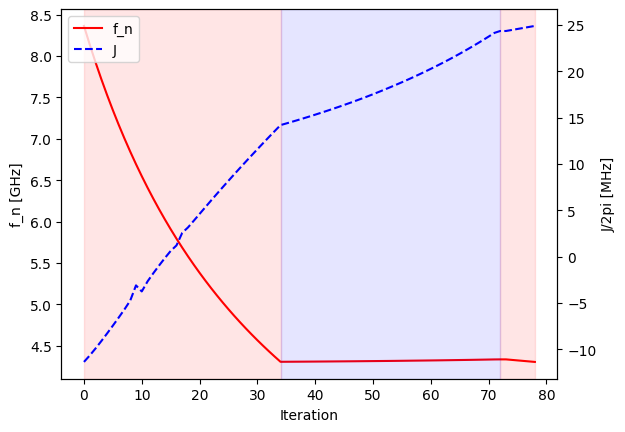

----------



L_Gn = 1189.00 um
L_Gf = 3025.00 um
L_c = 500.00 um
L_Rn = 475.00 um
L_Rf = 3025.00 um
d = 7.50 um




SHIFTED VALUES
L_Gn = 774.00 um
L_Gf = 3440.00 um
L_c = 500.00 um
L_Rn = 890.00 um
L_Rf = 2610.00 um
d = 7.50 um


In [10]:
len_r1 = 4714e-6
len_r2 = 4000e-6
fn = 4.3e9
J = 25e6*2*np.pi
target = [len_r1, len_r2, fn, J]

Cs = 2.7e-14
#Cs = 1.7e-14
calibration_len=250e-6

x0 = [1300e-6, 500e-6, 1300e-6, 15e-6]
l_Gn, l_Gf, l_c, l_Rn, l_Rf, d = rr_a.solve_for_r_r(target, x0, Cs, calibration_len=calibration_len)


shift = 890e-6-l_Rn
l_Rn = 890e-6
l_Rf = l_Rf-shift
l_Gf = l_Gf+shift
l_Gn = l_Gn-shift

print("\n\n\n")
print("SHIFTED VALUES")
print(f'L_Gn = {l_Gn*1e6:.2f} um')
print(f'L_Gf = {l_Gf*1e6:.2f} um')
print(f'L_c = {l_c*1e6:.2f} um')
print(f'L_Rn = {l_Rn*1e6:.2f} um')
print(f'L_Rf = {l_Rf*1e6:.2f} um')
print(f'd = {d*1e6:.2f} um')

notch_f = 4.00 GHz
J = 21.90 MHz


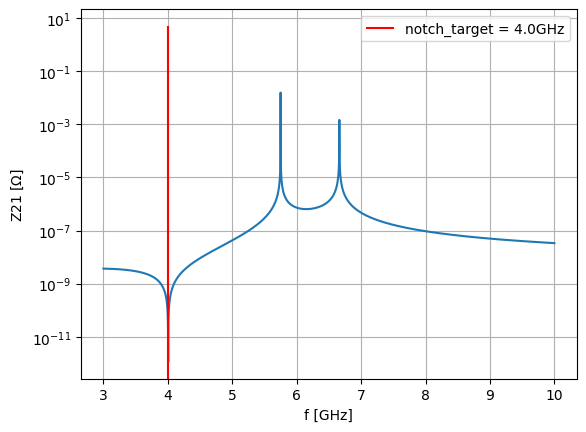

In [6]:
rr_a.plot_transmission(l_Rf+calibration_len, l_Rn+calibration_len, l_Gf+calibration_len, l_Gn+calibration_len, l_c, d, Cs, notch_target=fn)